In [0]:
import pyspark
from pyspark.ml.feature import StringIndexer,OneHotEncoder,VectorAssembler
from pyspark.ml.classification import LogisticRegression,DecisionTreeClassifier,NaiveBayes,RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
import numpy as np
import pandas as pd
import seaborn as sns
from pyspark.ml.feature import StandardScaler,PCA


In [0]:
df_tr=spark.read.option("header",True).option("inferSchema",True).csv("/FileStore/tables/titanic_train.csv")

In [0]:
df_test=spark.read.option("header",True).option("inferSchema",True).csv("/FileStore/tables/titanic_test.csv")

In [0]:
display(df_tr)

survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,null,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,null,S
1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,null,S
0,3,"Moran, Mr. James",male,null,0,0,330877,8.4583,null,Q
0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,null,S
1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,null,S
1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,null,C


In [0]:
df_tr.show(5)

+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|survived|pclass|                name|   sex| age|sibsp|parch|          ticket|   fare|cabin|embarked|
+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
only showing top 5 rows



In [0]:
#checking missing values
df_tr_pd=df_tr.toPandas()
df_test_pd=df_test.toPandas()
df_tr_pd.isna().sum()

Out[110]: survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [0]:
df_test_pd.isna().sum()

Out[111]: pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64

In [0]:
df_tr_pd.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


In [0]:
df_tr_pd.dtypes

Out[113]: survived      int32
pclass        int32
name         object
sex          object
age         float64
sibsp         int32
parch         int32
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [0]:
df_tr_pd["cabin"].mode()[0]

Out[73]: 'B96 B98'

Out[114]: <seaborn.axisgrid.FacetGrid at 0x7f8ab3d70700>

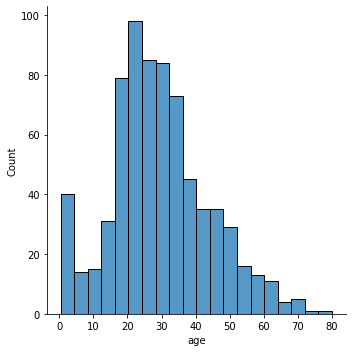

In [0]:
sns.displot(df_tr_pd["age"])


Out[75]: <seaborn.axisgrid.FacetGrid at 0x7f8aaf5c0400>

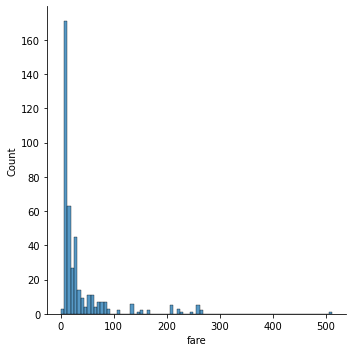

In [0]:
sns.displot(df_test_pd["fare"])

In [0]:
df_test_pd["fare"].kurtosis()

Out[115]: 17.92159525773599

In [0]:
df_tr_pd["age"].skew()

Out[77]: 0.38910778230082704

In [0]:
df_test_pd["fare"].skew()

Out[78]: 3.6872133081121405

In [0]:
df_tr_pd["embarked"].mode()[0]

Out[79]: 'S'

In [0]:
df_tr_pd["embarked"].value_counts()

Out[80]: S    644
C    168
Q     77
Name: embarked, dtype: int64

In [0]:
df_tr_pd.columns

Out[81]: Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [0]:
#creating dataframe from pandas
spark.createDataFrame(df_tr_pd)

Out[116]: DataFrame[survived: int, pclass: int, name: string, sex: string, age: double, sibsp: int, parch: int, ticket: string, fare: double, cabin: string, embarked: string]

In [0]:
df_tr_pd.isna().sum()

Out[117]: survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [0]:
df_tr_pd["fare"].median()

Out[106]: 14.4542

In [0]:
def clean(df):
    #replace age
    m=np.mean(df["age"])
    df["age"].fillna(m,inplace=True)
    df.drop("cabin",axis=1,inplace=True)
    df["embarked"].fillna("S",inplace=True)
    m_fare=np.median(df[df["fare"].isna()==False]["fare"])
    df["fare"].fillna(m_fare,inplace=True)
    df.drop(["ticket","name"],axis=1,inplace=True)
    return spark.createDataFrame(df)


In [0]:
df_tr_pd.columns

Out[119]: Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [0]:
df_clean_tr=clean(df_tr_pd)

In [0]:
df_tr_pd.columns

Out[121]: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [0]:
stage1_encode=StringIndexer(inputCols=['sex','embarked'],outputCols=['sex_idx','embarked_idx'])
stage2_encode=OneHotEncoder(inputCols=['sex_idx','embarked_idx'],outputCols=['sex_ohe','embarked_ohe'])
stage3_encode=VectorAssembler(inputCols=['pclass',  'sex_ohe', 'age', 'sibsp', 'parch', 'fare', 'embarked_ohe'],outputCol="features")

In [0]:
mypipeline=Pipeline(stages=[stage1_encode,stage2_encode,stage3_encode])

In [0]:
df_final=mypipeline.fit(df_clean_tr).transform(df_clean_tr)

In [0]:
display(df_final)

survived,pclass,sex,age,sibsp,parch,fare,embarked,sex_idx,embarked_idx,sex_ohe,embarked_ohe,features
0,3,male,22.0,1,0,7.25,S,0.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> dense, length -> 8, values -> List(3.0, 1.0, 22.0, 1.0, 0.0, 7.25, 1.0, 0.0))"
1,1,female,38.0,1,0,71.2833,C,1.0,1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 2, indices -> List(1), values -> List(1.0))","Map(vectorType -> dense, length -> 8, values -> List(1.0, 0.0, 38.0, 1.0, 0.0, 71.2833, 0.0, 1.0))"
1,3,female,26.0,0,0,7.925,S,1.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 8, indices -> List(0, 2, 5, 6), values -> List(3.0, 26.0, 7.925, 1.0))"
1,1,female,35.0,1,0,53.1,S,1.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> dense, length -> 8, values -> List(1.0, 0.0, 35.0, 1.0, 0.0, 53.1, 1.0, 0.0))"
0,3,male,35.0,0,0,8.05,S,0.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> dense, length -> 8, values -> List(3.0, 1.0, 35.0, 0.0, 0.0, 8.05, 1.0, 0.0))"
0,3,male,29.69911764705882,0,0,8.4583,Q,0.0,2.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 2, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 8, indices -> List(0, 1, 2, 5), values -> List(3.0, 1.0, 29.69911764705882, 8.4583))"
0,1,male,54.0,0,0,51.8625,S,0.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> dense, length -> 8, values -> List(1.0, 1.0, 54.0, 0.0, 0.0, 51.8625, 1.0, 0.0))"
0,3,male,2.0,3,1,21.075,S,0.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> dense, length -> 8, values -> List(3.0, 1.0, 2.0, 3.0, 1.0, 21.075, 1.0, 0.0))"
1,3,female,27.0,0,2,11.1333,S,1.0,0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))","Map(vectorType -> dense, length -> 8, values -> List(3.0, 0.0, 27.0, 0.0, 2.0, 11.1333, 1.0, 0.0))"
1,2,female,14.0,1,0,30.0708,C,1.0,1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())","Map(vectorType -> sparse, length -> 2, indices -> List(1), values -> List(1.0))","Map(vectorType -> dense, length -> 8, values -> List(2.0, 0.0, 14.0, 1.0, 0.0, 30.0708, 0.0, 1.0))"


In [0]:
df_final2=df_final.select("features","survived")

In [0]:
df_final2.show()

+--------------------+--------+
|            features|survived|
+--------------------+--------+
|[3.0,1.0,22.0,1.0...|       0|
|[1.0,0.0,38.0,1.0...|       1|
|(8,[0,2,5,6],[3.0...|       1|
|[1.0,0.0,35.0,1.0...|       1|
|[3.0,1.0,35.0,0.0...|       0|
|(8,[0,1,2,5],[3.0...|       0|
|[1.0,1.0,54.0,0.0...|       0|
|[3.0,1.0,2.0,3.0,...|       0|
|[3.0,0.0,27.0,0.0...|       1|
|[2.0,0.0,14.0,1.0...|       1|
|[3.0,0.0,4.0,1.0,...|       1|
|(8,[0,2,5,6],[1.0...|       1|
|[3.0,1.0,20.0,0.0...|       0|
|[3.0,1.0,39.0,1.0...|       0|
|(8,[0,2,5,6],[3.0...|       0|
|(8,[0,2,5,6],[2.0...|       1|
|[3.0,1.0,2.0,4.0,...|       0|
|[2.0,1.0,29.69911...|       1|
|[3.0,0.0,31.0,1.0...|       0|
|(8,[0,2,5,7],[3.0...|       1|
+--------------------+--------+
only showing top 20 rows



In [0]:
df_final2=df_final2.withColumnRenamed("survived","label")

In [0]:
logit_pipeline=Pipeline(stages=[StandardScaler(inputCol="features",outputCol="features_scaled"),LogisticRegression(featuresCol="features_scaled",labelCol="label")])
naive_pipeline=Pipeline(stages=[StandardScaler(inputCol="features",outputCol="features_scaled"),NaiveBayes(featuresCol="features_scaled",labelCol="label")])
dtree_pipeline=Pipeline(stages=[StandardScaler(inputCol="features",outputCol="features_scaled"),DecisionTreeClassifier(featuresCol="features_scaled",labelCol="label")])


In [0]:
#split the data into train test
tr,test=df_final2.randomSplit([.75,.25],seed=100)

In [0]:
model_pipeline=[logit_pipeline,naive_pipeline,dtree_pipeline]

In [0]:
model_fit=[]
for i in model_pipeline:
    j=i.fit(tr).transform(tr)
    model_fit.append(j)


In [0]:
model_fit[0].show()

+--------------------+-----+--------------------+--------------------+--------------------+----------+
|            features|label|     features_scaled|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+--------------------+----------+
|(8,[0,1,2,5],[3.0...|    0|(8,[0,1,2,5],[3.5...|[1.83492218227011...|[0.86234705533557...|       0.0|
|(8,[0,2,3,5],[3.0...|    1|(8,[0,2,3,5],[3.5...|[-0.5298084493170...|[0.37056156529625...|       1.0|
|(8,[0,2,5],[3.0,1...|    1|(8,[0,2,5],[3.557...|[-1.4796095316942...|[0.18548640446791...|       1.0|
|(8,[0,2,5],[3.0,2...|    1|(8,[0,2,5],[3.557...|[-0.9087039525423...|[0.28726512184205...|       1.0|
|(8,[0,2,5],[3.0,2...|    1|(8,[0,2,5],[3.557...|[-0.9087039525423...|[0.28726512184205...|       1.0|
|(8,[0,2,5],[3.0,2...|    1|(8,[0,2,5],[3.557...|[-0.9088632788443...|[0.28723250186382...|       1.0|
|(8,[0,2,5],[3.0,2...|    1|(8,[0,2,5],[3.557...|[-0.9092528847615...|[0.

In [0]:
model_fit[1].show()

+--------------------+-----+--------------------+--------------------+--------------------+----------+
|            features|label|     features_scaled|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+--------------------+----------+
|(8,[0,1,2,5],[3.0...|    0|(8,[0,1,2,5],[3.5...|[-12.669117290497...|[0.90033716451906...|       0.0|
|(8,[0,2,3,5],[3.0...|    1|(8,[0,2,3,5],[3.5...|[-12.838531854055...|[0.58879516126777...|       0.0|
|(8,[0,2,5],[3.0,1...|    1|(8,[0,2,5],[3.557...|[-7.2339593153186...|[0.65113505935865...|       0.0|
|(8,[0,2,5],[3.0,2...|    1|(8,[0,2,5],[3.557...|[-8.9229244449528...|[0.63241617414346...|       0.0|
|(8,[0,2,5],[3.0,2...|    1|(8,[0,2,5],[3.557...|[-8.9229244449528...|[0.63241617414346...|       0.0|
|(8,[0,2,5],[3.0,2...|    1|(8,[0,2,5],[3.557...|[-8.9252640366972...|[0.63225685253614...|       0.0|
|(8,[0,2,5],[3.0,2...|    1|(8,[0,2,5],[3.557...|[-8.9309851183762...|[0.

In [0]:
eval=BinaryClassificationEvaluator(labelCol="label",rawPredictionCol="prediction",metricName="areaUnderROC")

In [0]:
#logistic regression
eval.evaluate(model_fit[0])

Out[177]: 0.7749435847840103

In [0]:
#naive bayes
eval.evaluate(model_fit[1])

Out[178]: 0.6842359767891683

In [0]:
#decision tree
eval.evaluate(model_fit[2])

Out[180]: 0.8248710509348808